In [28]:
from qiskit import *
from qiskit.tools import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [29]:
# Loading your IBM Quantum account(s)
#IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()
backend = provider.get_backend('ibmq_manila')

In [103]:
#Manually creating the CZ gate
def cz_3(Quantum_Circuit):
    Quantum_Circuit.h(3)
    Quantum_Circuit.cx([0,1,2],3) #controls of 0, 1, and 2, and a target of 3
    Quantum_Circuit.h(3) #takes the qubit back out of superposition
    
#Create the Oracle
def oracle(Quantum_Circuit, binary):
    reversed_num = binary[::-1]
    for i in range(4):
        if reversed_num[i] == "0":
            Quantum_Circuit.x(i)
    cz_3(Quantum_Circuit)
    for i in range(4):
        if reversed_num[i] == "0":
            Quantum_Circuit.x(i)

#Amplitude Amplification
def amplification(Quantum_Circuit):
    circuit.h([0,1,2,3]) 
    circuit.x([0,1,2,3]) 
    cz_3(circuit)
    circuit.x([0,1,2,3]) 
    circuit.h([0,1,2,3]) 

#Job executuion function to manipulate how many times it is run
def execute_job(number_of_times, num):
    list_of_counts = []
    for i in range(number_of_times):
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(trans_circuit, backend=simulator, shots=100)
        counts = job.result().get_counts()
        print(type(counts))
        if max(counts) == num:
            list_of_counts.append("True")
        else:
            list_of_counts.append("False")
        print(counts)
    print(list_of_counts)

Enter a value between 0 and 15: 
13
In binary, that is:  1101
1101


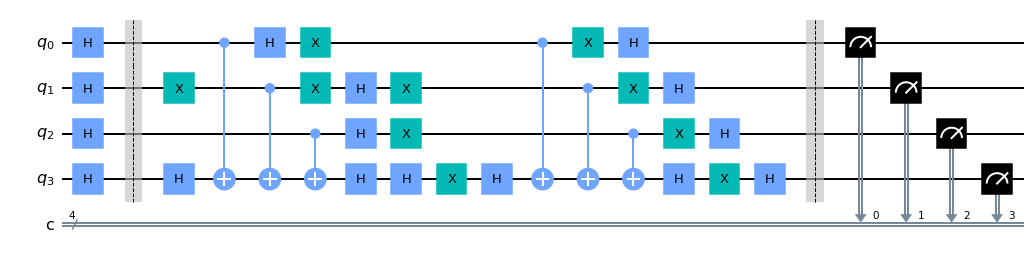

In [97]:
#Ask for an input (will be done by HPC)
print('Enter a value between 0 and 15: ')

#Converting the base ten number to binary
dec = int(input())
num = bin(dec).replace("0b", "")
if dec > 15 or dec < 0:
    print("Try again")
else:
    print("In binary, that is: ", num)

#Making there be four bits
placeholder = num[::-1]
while len(placeholder) < 4:
    placeholder += "0"
num = placeholder[::-1]
print(num)
##########
circuit = QuantumCircuit(4, 4)

#Initialization
circuit.h([0,1,2,3]) 
circuit.barrier([0,1,2,3])

#Oracle and Amplification

oracle(circuit, num)
amplification(circuit)
circuit.barrier([0,1,2,3])
#oracle(circuit,num)
#amplification(circuit)
#circuit.barrier([0,1,2,3])

#Measures
circuit.measure([0,1,2,3],[0,1,2,3])

#Draw
circuit.draw(output = 'mpl', justify = 'left', initial_state = True)

#Transpile
trans_circuit = transpile(circuit, basis_gates = ['u', 'cx'])
#trans_circuit.draw(output = 'mpl')
circuit.draw(output = 'mpl')

In [ ]:
#Getting the results with a real QC
#
#job = backend.run(transpile(circuit, backend=backend), shots=1024)
#print(job.job_id())
#job_monitor(job)

In [ ]:
#retrieve previously-run job
#job = backend.retrieve_job(job.job_id()) 
#import matplotlib.pyplot as plt
#plt.style.use('dark_background')
#plot_histogram(job.result().get_counts())

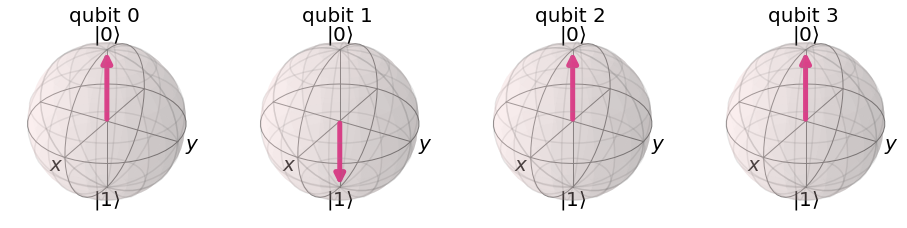

In [60]:
#For running on a simulator
from qiskit import BasicAer, Aer, execute
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('statevector_simulator')

out1 = execute(circuit,backend).result().get_statevector()
plot_bloch_multivector(out1)

#simulator = Aer.get_backend('qasm_simulator')
#job = execute(circuit, backend=simulator, shots=1000)
#counts = job.result().get_counts()

#plot_histogram(counts)

In [105]:
execute_job(10, num)
print(num)

<class 'qiskit.result.counts.Counts'>
{'1011': 31, '1000': 26, '1101': 24, '1110': 19}
<class 'qiskit.result.counts.Counts'>
{'1011': 23, '1110': 26, '1000': 26, '1101': 25}
<class 'qiskit.result.counts.Counts'>
{'1110': 22, '1011': 25, '1101': 29, '1000': 24}
<class 'qiskit.result.counts.Counts'>
{'1011': 24, '1000': 14, '1101': 32, '1110': 30}
<class 'qiskit.result.counts.Counts'>
{'1110': 24, '1011': 29, '1000': 23, '1101': 24}
<class 'qiskit.result.counts.Counts'>
{'1011': 27, '1110': 21, '1000': 33, '1101': 19}
<class 'qiskit.result.counts.Counts'>
{'1110': 28, '1101': 15, '1000': 27, '1011': 30}
<class 'qiskit.result.counts.Counts'>
{'1011': 28, '1110': 26, '1000': 26, '1101': 20}
<class 'qiskit.result.counts.Counts'>
{'1110': 21, '1000': 30, '1101': 29, '1011': 20}
<class 'qiskit.result.counts.Counts'>
{'1110': 26, '1011': 25, '1101': 30, '1000': 19}
['False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False']
1101
